# Machine Learning methodology and tools

This is a demo of the Machine Learning methodology and industry-standard tools and techniques used for it.


## Importing Keras

In [2]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

## Load training data for the hand-written digit dataset

In [41]:
# set train/test data sizes
max_train = 2000
max_test = 300

In [42]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='/home/dmitry/projects/cnn_ocr/data/mnist.npz')

X_train = X_train[:max_train]
y_train = y_train[:max_train]
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_test = X_test[:max_test]
y_test = y_test[:max_test]

X_train original shape (2000, 28, 28)
y_train original shape (2000,)


## Examples of training data

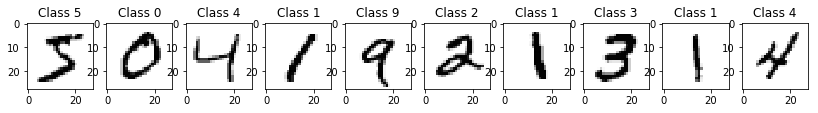

In [43]:
plt.figure(figsize=(14,14)) 

for i in range(10):              
    fig = plt.subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap='Greys', interpolation='none')    
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = X_train.reshape(max_train, 784)
X_test = X_test.reshape(max_test, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

In [44]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Target matrices should be in the one-hot format:

```
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
```

In [46]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Conventional ANN model

In [47]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
        
model.add(Dense(nb_classes, activation='softmax', name='preds'))

![ANN](img/nn_general.png "Using ANN for OCR")

## CNN model

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax', name='preds'))

![CNN](img/cnn_detailed.png "CNN for OCR")

In [50]:
from keras import backend as K
import tensorflow as tf

K.get_session().close()
K.set_session(tf.Session())
K.get_session().run(tf.global_variables_initializer())

## Compile the model

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the model on the training data set

In [53]:
max_epochs = 8

In [56]:
hist = model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=max_epochs, verbose=1,
          validation_split = 0.1)

/home/dmitry/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 1800 samples, validate on 200 samples
Epoch 1/8
1800/1800 [==============================] - 3s 2ms/step - loss: 7.5700 - acc: 0.5094 - val_loss: 5.6550 - val_acc: 0.6350
Epoch 2/8
1800/1800 [==============================] - 3s 2ms/step - loss: 5.8376 - acc: 0.6050 - val_loss: 3.9762 - val_acc: 0.7350
Epoch 3/8
1800/1800 [==============================] - 3s 2ms/step - loss: 3.3933 - acc: 0.7089 - val_loss: 0.4752 - val_acc: 0.9000
Epoch 4/8
1800/1800 [==============================] - 4s 2ms/step - loss: 0.7135 - acc: 0.8378 - val_loss: 0.2616 - val_acc: 0.9100
Epoch 5/8
1800/1800 [==============================] - 4s 2ms/step - loss: 0.4104 - acc: 0.8778 - val_loss: 0.1749 - val_acc: 0.9550
Epoch 6/8
1800/1800 [==============================] - 3s 2ms/step - loss: 0.2601 - acc: 0.9233 - val_loss: 0.1520 - val_acc: 0.9450
Epoch 7/8
1800/1800 [==============================] - 3s 2ms/step - loss: 0.2239 - acc: 0.9344 - val_loss: 0.1490 - val_acc: 0.9400
Epoch 8/8
1800/1800 [=

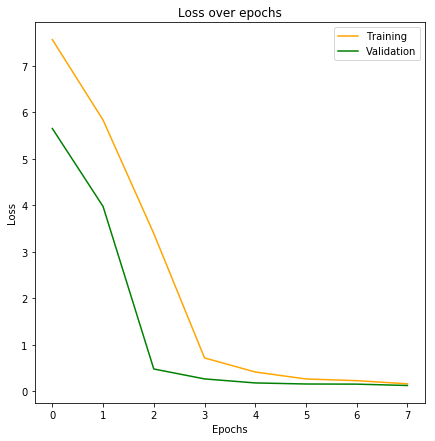

<Figure size 216x288 with 0 Axes>

In [62]:
epochs = range(max_epochs)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label='Training', color='orange')
plt.plot(epochs, val_loss, label='Validation', color='green')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure(figsize=(3,4))
plt.show()

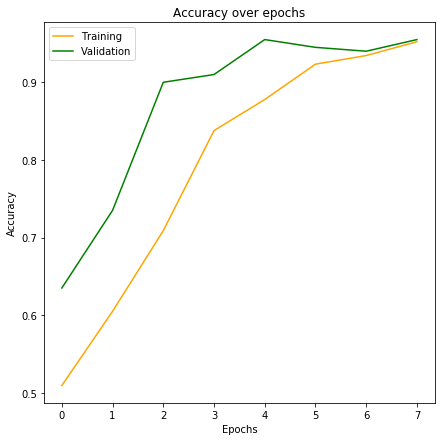

In [63]:
epochs = range(max_epochs)
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

import matplotlib.pyplot as plt

plt.plot(epochs, train_acc, label='Training', color='orange')
plt.plot(epochs, val_acc, label='Validation', color='green')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluate model performance on the heldout (out-of-sample) data (test set)

In [77]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=1)[1]*100
print(f'Test accuracy: {test_accuracy}%')

300/300 [==============================] - 0s 962us/step
Test accuracy: 95.3333334128062%


## Compare accuracy on the training and test sets

In [75]:
train_accuracy = model.evaluate(X_train, Y_train, verbose=1)[1]*100
print(f'Test accuracy: {train_accuracy}%')

2000/2000 [==============================] - 2s 793us/step
Test accuracy: 98.9%


[Text(0, 0.5, 'Classification accuracy'),
 Text(0.5, 0, 'Sets'),
 Text(0.5, 1.0, 'Classification accuracy')]

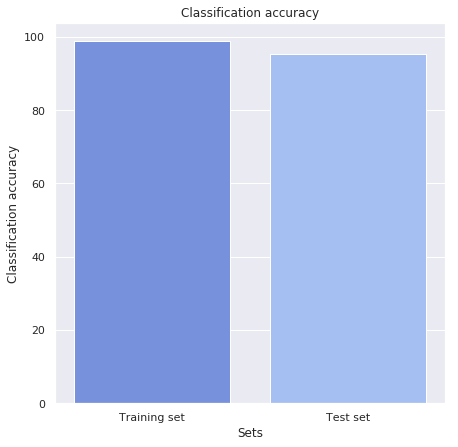

In [103]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("coolwarm")

y = [train_accuracy, test_accuracy]
x = ['Training set', 'Test set']
fig = sns.barplot(x, y)
fig.set(xlabel='Sets', ylabel='Classification accuracy', title='Classification accuracy')


## Verifying the model output on the Test Set

In [104]:
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Correct classifications


<Figure size 1440x1440 with 0 Axes>

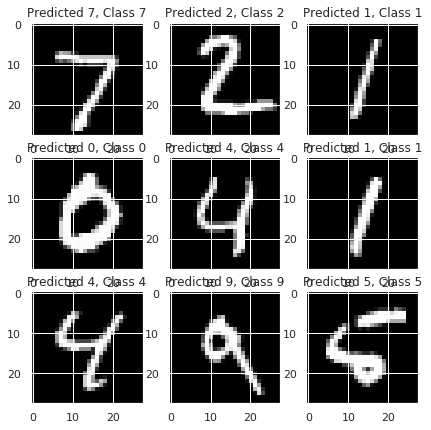

In [132]:
print('Correct classifications')
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=10)
plt.tight_layout()

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    fig = plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    


Incorrect classifications:


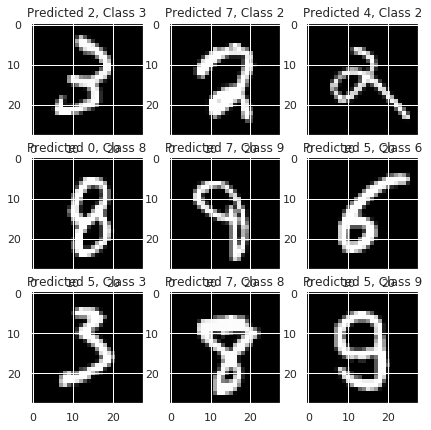

In [130]:
print('Incorrect classifications:')   

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Calculate the confusion matrix

In [134]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(y_test, predicted_classes)
print(confusion)

[[24  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  1  0  0  1  0  0]
 [ 0  0  1 22  0  1  0  0  0  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  1 23  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 2  0  0  0  1  0  1  1 16  0]
 [ 0  0  0  0  1  1  0  1  0 31]]


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_plot(y_true, y_pred, labels, ymap=None, figsize=(10,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="Greens")
    plt.show()

<Figure size 504x504 with 0 Axes>

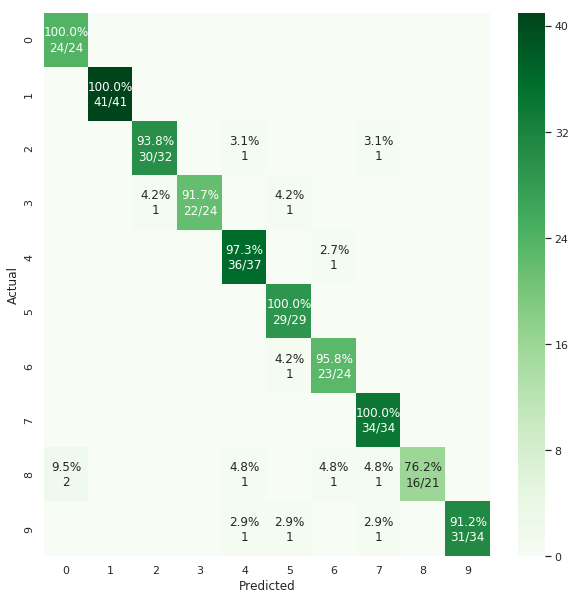

In [137]:
plt.clf()
cm_plot(y_test, predicted_classes, labels=[0,1,2,3,4,5,6,7,8,9], ymap=None, figsize=(10,10))

## Pick a number

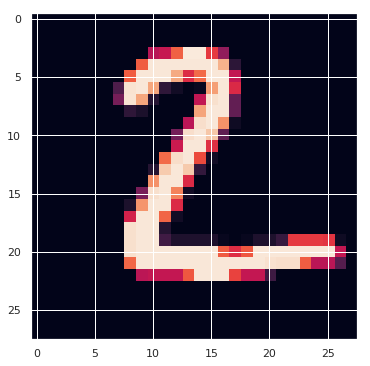

In [138]:
digit_to_instpect = 2

class_idx = 0
indices = np.where(y_test[:] == digit_to_instpect)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

symbol_img = X_test[idx].reshape(28,28)
plt.imshow(symbol_img)

## Generate a saliency map

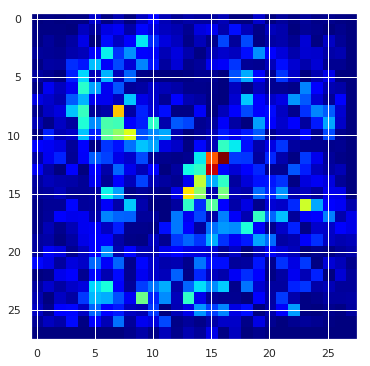

In [139]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads.reshape(28,28), cmap='jet')